In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import sys
from scipy.special import cbrt

# Плохая обусловленность метода Кардано 

## Метод Кардано

Нужно рассмотреть формулу для решения кубического уравнения - формулу Кардано и сравнить результаты с методом Брента и Ньютона.

Дано кубичесткое уравнение вида:
$$
ax^3 + bx^2 + cx + d = 0, a!=0
$$

Первый корень
$$
x1 = \alpha + \beta - \frac{b}{3a}
$$


Второй корень
$$
x2 = -\frac{\alpha + \beta}{2} - \frac{b}{3a} - \frac{i\sqrt3}{3a}(\alpha - \beta)
$$



Третий корень
$$
x3 = -\frac{\alpha + \beta}{2} - \frac{b}{3a} + \frac{i\sqrt3}{3a}(\alpha - \beta)
$$

$$
\alpha=\sqrt[3]{-\frac{q}{2}+\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}}
$$


$$
\beta=\sqrt[3]{-\frac{q}{2}-\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}}.
$$

$$
Q = \frac{3ac - b^2}{9a^2}
$$
$$
R = \frac{9abc - 27a^2d - 2b^3}{54a^3}
$$

Дискрминант
$$
D = Q^3 + R^2
$$

#### Видео с разбором формулы Кардано от лектора - А.В. Шанина
https://www.youtube.com/watch?v=SCRStXup2Xw

In [6]:
def cardano(a, b, c, d):
    if a == 0:
        raise ValueError('Параметр a не может быть равен 0')
    x = (3*a*c - b**2)/ (9*a**2)
    k = (9*a*b*c - 27*a**2*d - 2*b**3) / (54 * a**3)
    D = ((3*a*c - b**2)/ (9*a**2))**3 +((9*a*b*c - 27*a**2*d - 2*b**3) / (54 * a**3))**2 
    alf = cbrt(((9*a*b*c - 27*a**2*d - 2*b**3) / (54 * a**3)) + np.sqrt(D))
    beta = cbrt(((9*a*b*c - 27*a**2*d - 2*b**3) / (54 * a**3)) - np.sqrt(D)) 
    if D > 0:
        t = 0.5j * np.sqrt(3) * (alf - beta)
    else:
        t = 0.5 * np.sqrt(3) * (alf - beta)
    y0 = - b / (3 * a) + (alf + beta)
    y1 = - b / (3 * a)  - (alf + beta) / 2 + t
    y2 = - b / (3 * a)  - (alf + beta) / 2 -  t
    return y0, y1, y2 

Функция машинного эпсилона

In [7]:
def get_eps():
    return sys.float_info.epsilon

In [8]:
get_eps()

2.220446049250313e-16

Для сравнения используем $ y^3 + 3y^2 + \lambda^2y + 3\lambda^2=0 $

In [9]:
def f(y, a):
    return y**3 + 3*y**2 + a**2*y + 3*a**2;

# График Кардано

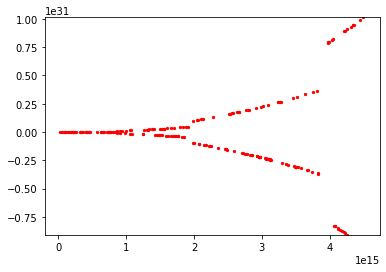

In [10]:
y_min = 0
y_max = 0
xx = np.linspace(0,01./get_eps(), 1000) # Из-за неточности формулы используем маленькие числа для проверки 
for x in xx: 
    y0 = cardano(1, 3, x**2, 3*x**2)[0]
    y = f(y0, x)
    if y != 0:
        y_max = max(y_max, y)
        y_min = min(y_min, y)
        plt.scatter(x, y, c = 'red', s = 5)
plt.ylim(bottom = y_min, top = y_max)
plt.show()

### Сравнение допускаемых ошибок 
Сравнение эффективности метода Кардано с методом Брента и методом Ньютона

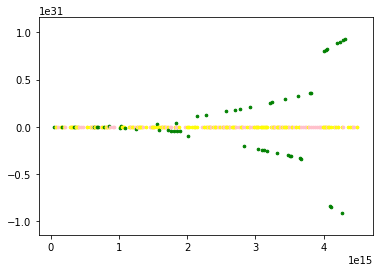

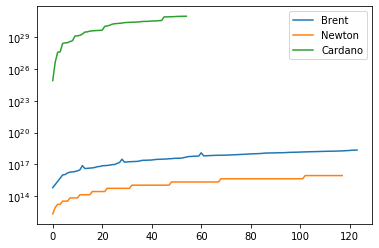

In [12]:
y_max = 0
y_min = 0
x_all=[]
y_all=[]
x__all=[]
x____all=[]
xx = np.linspace(0,  1./get_eps(), 300)

for x in xx: 
    expression = lambda _x:f(_x, x)

    cardano_y = f(cardano(1, 3, x**2, 3*x**2)[0], x)
    newton_y = f(opt.newton(expression, 0), x)
    brentq_y = f(opt.brentq(expression, -1000, 1000), x)
    
          
    if brentq_y != 0:
        x0=  f(opt.brentq(expression, -1000, 1000), x)
        x_all.append(x0)
        x_brent=x_all
        y_max = max(y_max, brentq_y)
        y_min = min(y_min, brentq_y)

        plt.scatter(x, newton_y, c = 'pink', s = 7)
    
    if newton_y != 0:
        x0=  f(opt.newton(expression, 0), x)
        y_all.append(x0)
        x_newton=y_all
        y_max = max(y_max, newton_y)
        y_min = min(y_min, newton_y)

        plt.scatter(x, newton_y, c = 'yellow', s = 7)
        
    if cardano_y != 0:
        x0=  f(cardano(1, 3, x**2, 3*x**2)[0], x)
        x__all.append(x0)
        x_car=x__all
        y_max = max(y_max, cardano_y)
        y_min = min(y_min, cardano_y)
        
        plt.scatter(x, cardano_y, c = 'green', s = 7)
        
  
        
        
plt.ylim(bottom = y_min * 1.25, top = y_max * 1.25)
plt.show()
plt.semilogy(np.abs(np.array(x_brent)  - np.pi), label='Brent')
plt.semilogy(np.abs(np.array(x_newton) - np.pi), label='Newton')
plt.semilogy(np.abs(np.array(x_car) - np.pi), label='Cardano')
plt.legend()
pass

### Вывод
С помощью графика можно сделать вывод, что метод Кардано допускает всё больше ошибок при большем количестве значений на входе, а методы Брента и Ньютона допускают практически одинаковое количество ошибок, но значительно меньше, чем с помощью метода Кардано.